# K-means Clustering

## K-means Clustering

See: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py


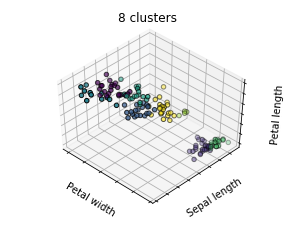

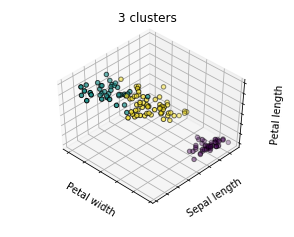

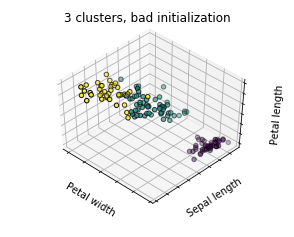

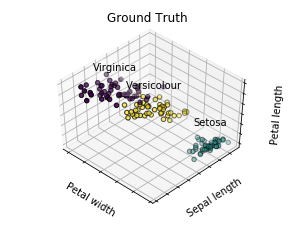

In [4]:
%matplotlib inline

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

## IRIS data – KMeans clustering

See: See: http://constantgeeks.com/playing-with-iris-data-kmeans-clustering-in-pytho

Text(0.5,1,"Model's classification")

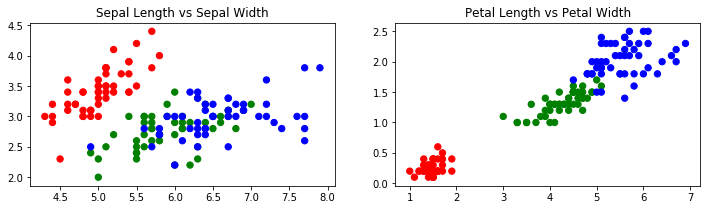

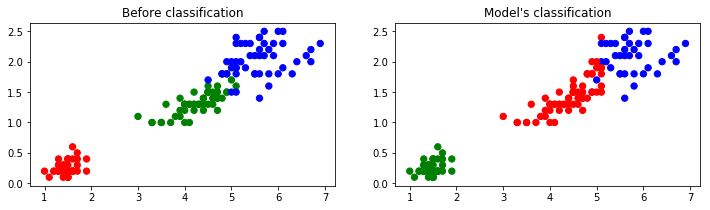

In [1]:
# See: http://constantgeeks.com/playing-with-iris-data-kmeans-clustering-in-python/

%matplotlib inline

from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()

x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

# Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

#Draw a Scatter plot for Sepal Length vs Sepal Width
plt.subplot(1, 2, 1) # nrows=1, ncols=2, plot_number=1
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']], s=40)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y.Target], s=40)
plt.title('Petal Length vs Petal Width')

# create a model object with 3 clusters
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# http://scikit-learn.org/stable/modules/clustering.html#k-means
model = KMeans(n_clusters=3)
model.fit(x)

#Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

# The fudge to reorder the cluster ids.
predictedY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

# Plot the classifications that we saw earlier between Petal Length and Petal Width
plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']], s=40)
plt.title('Before classification')
 
# Plot the classifications according to the model
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY], s=40)
plt.title("Model's classification")